In [49]:
pip install matplotlib

     |████████████████████████████████| 7.2 MB 5.1 MB/s 
     |████████████████████████████████| 61 kB 1.8 MB/s 
     |████████████████████████████████| 3.0 MB 8.0 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [33]:
df = pd.read_csv("GSE130325_Cirovic_RNA_counts.csv")
df

,Gene,GMP_41_inf,GMP_42_inf,GMP_45_inf,GMP_46_ctrl,GMP_49_ctrl,GMP_50_ctrl,cMOP_41_inf,cMOP_42_inf,cMOP_43_inf,...,Ly6Ch_41_inf,Ly6Ch_42_inf,Ly6Ch_43_inf,Ly6Ch_44_inf,Ly6Ch_45_inf,Ly6Ch_46_ctrl,Ly6Ch_47_ctrl,Ly6Ch_48_ctrl,Ly6Ch_49_ctrl,Ly6Ch_50_ctrl
0,A2ml1,0.000000,0.000000,0.000000,0.000000,2.601845,0.000000,0.000000,0.701638,0.000000,...,0.000000,0.000000,4.211741,0.566918,0.812441,0.000000,1.467841,0.000000,2.151123,3.687977
1,A3galt2,0.000000,1.038019,0.000000,2.016429,0.000000,0.000000,0.000000,6.245450,0.000000,...,1.761416,0.000000,0.000000,0.000000,1.482984,0.000000,0.000000,0.000000,0.000000,0.000000
2,A4galt,0.609916,3.484964,0.000000,0.000000,2.573275,5.117652,2.200916,2.866551,0.000000,...,5.913641,3.366598,0.860356,1.737112,3.319236,5.234926,2.784903,4.733284,0.000000,7.533638
3,AA386476,25.755360,43.814975,12.401650,16.497355,19.060546,15.863053,10.523666,7.359778,9.022168,...,11.497252,31.696829,21.732542,4.997987,8.083862,29.815299,31.714644,13.773376,24.725001,13.343900
4,AA387200,6.099162,1.161655,0.000000,2.256600,4.503231,5.117652,0.880366,7.883017,3.179157,...,0.000000,5.610996,0.860356,6.369412,0.829809,1.308732,8.354708,2.028550,4.394220,3.766819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17972,n-R5s39,1.219832,3.484964,0.000000,1.128300,0.643319,0.000000,0.440183,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.659618,2.617463,0.000000,1.352367,0.000000,0.000000
17973,n-R5s40,0.609916,0.000000,0.000000,0.000000,0.643319,0.000000,1.320550,0.000000,0.000000,...,1.971214,0.000000,0.000000,0.000000,1.659618,0.000000,0.000000,0.000000,0.000000,0.000000
17974,n-R5s67,0.000000,1.161655,3.111852,1.128300,0.000000,0.000000,0.000000,0.000000,3.179157,...,0.000000,0.000000,0.000000,1.158075,0.000000,0.000000,2.784903,0.000000,0.000000,0.000000
17975,n-R5s76,0.609916,1.161655,0.000000,0.000000,1.286637,0.000000,0.000000,1.433276,0.000000,...,0.000000,2.244399,0.860356,0.579037,0.000000,0.000000,2.784903,0.000000,0.000000,0.000000


In [59]:
x = [f[1:len(f)] for f in df.values]
x_inverted = []
for col in range(len(x[0])):
     temp_row = []
     for row in x:
          temp_row.append(row[col])
     x_inverted.append(temp_row)
x_inverted
# y = ['GMP_41_inf', '	GMP_42_inf	', 'GMP_45_inf', '	GMP_46_ctrl	', 'MP_49_ctrl	', 'GMP_50_ctrl	', 'cMOP_41_inf', '	cMOP_42_inf', '	cMOP_43_inf	', 'cMOP_44_inf	', 'cMOP_45_inf	', 'cMOP_46_ctrl', '	cMOP_47_ctrl	',
#      'cMOP_48_ctrl', '	cMOP_49_ctrl', '	cMOP_50_ctrl', '	Ly6Ch_41_inf', '	Ly6Ch_42_inf	', 'Ly6Ch_43_inf	', 'Ly6Ch_44_inf', '	Ly6Ch_45_inf	', 'Ly6Ch_46_ctrl	', 'Ly6Ch_47_ctrl	', 'Ly6Ch_48_ctrl	', 'Ly6Ch_49_ctrl	', 'Ly6Ch_50_ctrl']
# x = StandardScaler().fit_transform(x)

[[0.0,
  0.0,
  0.609916215,
  25.75536033,
  6.099162153,
  10.97849187,
  3.659497292,
  65.39037467,
  4.354390271,
  332.4043373,
  2.439664861,
  0.0,
  15.24790538,
  2.784393731,
  1.829748646,
  419.403629,
  11.58840809,
  23.97680734,
  10.97849187,
  23.17681618,
  0.0,
  0.0,
  4.156655473,
  16.46773781,
  2.439664861,
  1.219832431,
  7.928910798,
  0.0,
  0.0,
  15.8578216,
  9.148743229,
  4.879329722,
  73.18994583,
  2.439664861,
  2.439664861,
  0.609916215,
  0.609916215,
  1.829748646,
  4.269413507,
  25.61648104,
  7.318994583,
  7.928910798,
  0.609916215,
  2476.86975,
  204.3219321,
  12.19832431,
  142.7203944,
  4.269413507,
  0.0,
  1.219832431,
  0.0,
  1.829748646,
  9.758659444,
  0.0,
  0.609916215,
  0.0,
  1.219832431,
  1.219832431,
  21.34706753,
  79.8990242,
  2.439664861,
  5.489245937,
  6.709078368,
  23.17681618,
  6.099162153,
  2.697605165,
  1.219832431,
  0.0,
  6.709078368,
  10.36857566,
  3.049581076,
  9.148743229,
  0.0,
  69.53044854

In [61]:
len(x_inverted[0])

17977

In [62]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_inverted)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [63]:
principalDataframe

,PC1,PC2
0,-366761.145426,140278.437057
1,-370819.766368,130690.765954
2,-381742.462664,111219.812125
3,-365508.375340,109349.130407
4,-330589.812373,81531.075007
5,-407579.332248,162669.495855
6,-209888.149174,-45310.706255
7,-176129.426005,-68812.307087
8,-164867.808642,-115132.159921
9,-189683.756598,-126648.923254


In [ ]:
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

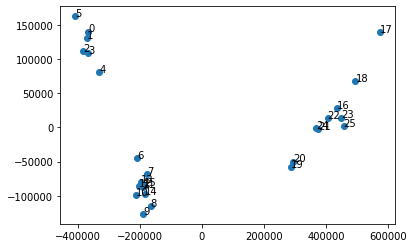

In [83]:
plt.scatter(principalDataframe['PC1'],principalDataframe['PC2'])
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
  plt.annotate(str(i), (principalDataframe['PC1'][i],principalDataframe['PC2'][i]))
plt.show()
